In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Sheart\Sheart_NG_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,1.0,70.0,4.0,130.0,NaN,0.0,2.0,109.0,0.0,2.4,2.0,NaN,3.0
1,0.0,67.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,NaN,7.0
2,1.0,57.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,NaN,1.0,0.0,7.0
3,1.0,64.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0
4,0.0,74.0,2.0,NaN,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1.0,52.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,NaN,1.0,0.0,7.0
266,1.0,44.0,2.0,120.0,263.0,0.0,NaN,173.0,0.0,NaN,1.0,0.0,7.0
267,0.0,56.0,2.0,140.0,294.0,0.0,NaN,153.0,0.0,1.3,2.0,0.0,3.0
268,1.0,57.0,4.0,140.0,192.0,0.0,0.0,148.0,NaN,0.4,2.0,0.0,NaN


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	14
float64		column 2	21
float64		column 3	21
float64		column 4	28
float64		column 5	29
float64		column 6	7
float64		column 7	28
float64		column 8	36
float64		column 9	36
float64		column 10	35
float64		column 11	29
float64		column 12	29
float64		column 13	29


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
count,256.000000,249.000000,249.000000,242.000000,241.000000,263.000000,242.000000,234.000000,234.000000,235.000000,241.000000,241.000000,241.000000
mean,0.675781,54.570281,3.168675,131.516529,249.319502,0.148289,1.000000,149.534188,0.311966,1.019574,1.572614,0.639004,4.701245
std,0.468999,9.012317,0.939534,16.782528,50.113471,0.356064,0.997923,22.572366,0.464289,1.092183,0.615695,0.907362,1.949882
min,0.000000,29.000000,1.000000,94.000000,141.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,0.000000,48.000000,3.000000,120.000000,213.000000,0.000000,0.000000,137.250000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,1.000000,55.000000,3.000000,130.000000,246.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,1.000000,61.000000,4.000000,140.000000,277.000000,0.000000,2.000000,164.750000,1.000000,1.600000,2.000000,1.000000,7.000000
max,1.000000,77.000000,4.000000,192.000000,564.000000,1.000000,2.000000,202.000000,1.000000,5.600000,3.000000,3.000000,7.000000


<AxesSubplot:>

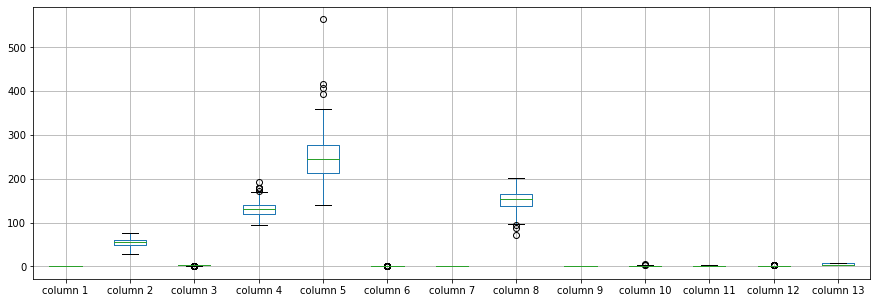

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1       0.675781
column 2      54.570281
column 3       3.168675
column 4     131.516529
column 5     249.319502
column 6       0.148289
column 7       1.000000
column 8     149.534188
column 9       0.311966
column 10      1.019574
column 11      1.572614
column 12      0.639004
column 13      4.701245
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
column 1,1.000000,-0.128916,0.021808,0.000111,-0.190033,0.032569,0.012433,-0.110363,0.208548,0.115295,0.048094,0.084066,0.350640
column 2,-0.128916,1.000000,0.114158,0.224628,0.244337,0.092555,0.103592,-0.396939,0.087384,0.166932,0.165252,0.313124,0.100542
column 3,0.021808,0.114158,1.000000,-0.104531,0.047670,-0.109507,0.052882,-0.294454,0.377730,0.122681,0.108031,0.246601,0.263508
column 4,0.000111,0.224628,-0.104531,1.000000,0.165314,0.137658,0.131130,-0.011974,0.053386,0.197560,0.181462,0.091507,0.138940
column 5,-0.190033,0.244337,0.047670,0.165314,1.000000,0.090342,0.178948,-0.020044,0.004597,0.057534,-0.015089,0.125026,0.025211
column 6,0.032569,0.092555,-0.109507,0.137658,0.090342,1.000000,0.045644,0.004323,-0.020945,-0.020806,0.082488,0.156361,0.039930
column 7,0.012433,0.103592,0.052882,0.131130,0.178948,0.045644,1.000000,-0.071449,0.089499,0.074235,0.127218,0.097815,-0.015842
column 8,-0.110363,-0.396939,-0.294454,-0.011974,-0.020044,0.004323,-0.071449,1.000000,-0.387048,-0.268551,-0.340893,-0.263636,-0.259875
column 9,0.208548,0.087384,0.377730,0.053386,0.004597,-0.020945,0.089499,-0.387048,1.000000,0.258296,0.291941,0.126446,0.337667
column 10,0.115295,0.166932,0.122681,0.197560,0.057534,-0.020806,0.074235,-0.268551,0.258296,1.000000,0.629499,0.294627,0.359773


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [13,13+19,13+19+19,13+19+19+19,13+19+19+19+19,13+19+19+19+19+19,13+19+19+19+19,13+19+19+19,13+19+19,13+19,13], vae_layer = False, seed = 19)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [13]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 540.9933700561523
Epoch: 1 , loss: 542.8635025024414
Epoch: 2 , loss: 541.2715358734131
Epoch: 3 , loss: 538.9662952423096
Epoch: 4 , loss: 542.1876888275146
Epoch: 5 , loss: 539.2034664154053
Epoch: 6 , loss: 539.8723411560059
Epoch: 7 , loss: 540.3875675201416
Epoch: 8 , loss: 545.6882457733154
Epoch: 9 , loss: 541.0773487091064
Epoch: 10 , loss: 539.62331199646
Epoch: 11 , loss: 544.5937232971191
Epoch: 12 , loss: 540.9887847900391
Epoch: 13 , loss: 539.9681529998779
Epoch: 14 , loss: 543.6597137451172
Epoch: 15 , loss: 535.0100383758545
Epoch: 16 , loss: 541.1269130706787
Epoch: 17 , loss: 540.5631732940674
Epoch: 18 , loss: 543.1499156951904
Epoch: 19 , loss: 540.5713558197021
Epoch: 20 , loss: 541.150032043457
Epoch: 21 , loss: 541.1300449371338
Epoch: 22 , loss: 538.4218769073486
Epoch: 23 , loss: 543.6173820495605
Epoch: 24 , loss: 543.6358585357666
Epoch: 25 , loss: 538.9606475830078
Epoch: 26

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(270, 13)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1       1.000000
column 2      48.000000
column 3       2.000000
column 4     130.000000
column 5     245.000000
column 6       0.000000
column 7       0.444658
column 8     180.000000
column 9       0.000000
column 10      0.200000
column 11      2.000000
column 12      0.000000
column 13      3.000000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Sheart.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,0.0,0.0,0.0,0.000000,-317.884849,0.0,0.000000,0.0,0.000000,0.000000,0.0,-2.721068,0.000000
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.368675,0.000000
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,-0.176629,0.0,0.000000,0.000000
3,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
4,0.0,0.0,0.0,-118.993279,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,-0.080376,0.0,0.000000,0.000000
266,0.0,0.0,0.0,0.000000,0.000000,0.0,0.348928,0.0,0.000000,0.338598,0.0,0.000000,0.000000
267,0.0,0.0,0.0,0.000000,0.000000,0.0,-1.896168,0.0,0.000000,0.000000,0.0,0.000000,0.000000
268,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.117998,0.000000,0.0,0.000000,-5.525346


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(1804.9478404822169, 5414.752392307519)

In [17]:
NRMS=numerator/denominator
NRMS


0.3333389432629312

In [18]:
new_df.iloc[66,:]

column 1       1.000000
column 2      51.000000
column 3       0.241022
column 4     140.000000
column 5       1.095869
column 6       0.000000
column 7       2.000000
column 8       1.041090
column 9       1.000000
column 10      0.000000
column 11      1.000000
column 12      0.000000
column 13      3.000000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,1.0,70.0,1.715745,130,322.0,-0.162483,2.000000,109.0,0.0,2.400000,2.000000,3.0,3.000000
1,0.0,67.0,3.000000,115,564.0,-0.037531,2.000000,160.0,0.0,1.600000,2.000000,0.0,2.325665
2,1.0,57.0,2.000000,124,261.0,0.000000,0.000000,141.0,0.0,0.460708,1.000000,0.0,7.000000
3,1.0,64.0,4.000000,128,263.0,-0.030485,0.000000,105.0,1.0,1.341907,2.000000,1.0,7.000000
4,0.0,74.0,2.000000,120,269.0,0.000000,2.000000,121.0,1.0,0.200000,1.000000,1.0,2.959619
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1.0,52.0,3.000000,172,199.0,1.000000,0.000000,162.0,0.0,0.500000,1.000000,0.0,7.000000
266,1.0,44.0,2.000000,120,263.0,0.000000,0.000000,173.0,0.0,0.000000,1.000000,0.0,7.000000
267,0.0,56.0,2.000000,140,294.0,-0.040476,2.000000,153.0,0.0,1.300000,2.000000,0.0,3.000000
268,1.0,57.0,4.000000,140,192.0,0.000000,0.000000,148.0,0.0,0.400000,3.542552,0.0,6.000000


In [19]:
imputations[-1].to_excel("Sheart_NG_10(imp).xlsx", index=False, header=False)